## 1. Introduction

Purpose and goals for this EDA

Data source

Background information

## 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd

import missingno
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
from ftfy import fix_text
from num2words import num2words

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')

import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

import sklearn

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kevin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the data and check the first few lines
# Need to change the file to after processing 

dataset_path = "../Raw Data Files/final_job_posting.csv"
dataset = pd.read_csv(dataset_path)
dataset.head()

title  telecommuting  has_company_logo  \
0                           Marketing Intern              0                 1   
1  Customer Service - Cloud Video Production              0                 1   
2    Commissioning Machinery Assistant (CMA)              0                 1   
3          Account Executive - Washington DC              0                 1   
4                        Bill Review Manager              0                 1   

   has_questions employment_type required_experience required_education  \
0              0           Other          Internship                NaN   
1              0       Full-time      Not Applicable                NaN   
2              0             NaN                 NaN                NaN   
3              0       Full-time    Mid-Senior level  Bachelor's Degree   
4              1       Full-time    Mid-Senior level  Bachelor's Degree   

   fraudulent location_country  title_contain_urgent  have_company_profile  \
0           0               US                     0                     1   
1           0               NZ                     0                     1   
2           0               US                     0                     1   
3           0               US                     0                     1   
4           0               US                     0                     1   

   have_requirements  have_benefits  \
0                  1              0   
1                  1              1   
2                  1              0   
3                  1              1   
4                  1              1   

                                           full_text  flesch_score_bin_ft  \
0  marketing intern food fifty two weve created g...                    7   
1  customer service cloud video production ninety...                    6   
2  commissioning machinery assistant cma valor se...                    7   
3  account executive washington dc passion improv...                    7   
4  bill review manager spotsource solutions llc g...                    7   

   fk_grade_level_bin_ft  high_salary  \
0                      1            0   
1                      2            0   
2                      2            0   
3                      1            0   
4                      1            0   

                                            category  flesch_score_cat  \
0                          Marketing and Advertising                 7   
1  Success Marketing and Advertising Customer Ser...                 7   
2                                        unspecified                 7   
3                            Sales Computer Software                 6   
4        unspecified Hospital & Health Care Provider                 6   

   fk_grade_level_cat  text_len  
0                   5       267  
1                   2       567  
2                   1       235  
3                   3       497  
4                   3       370

## 3. Basic Summary of the data

Display basic information about the dataset:

The number of rows and columns.
Data types of each column.
Summary statistics (mean, median, min, max and more)

In [4]:
print(dataset.shape)
dataset.info()

(25996, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25996 entries, 0 to 25995
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  25996 non-null  object
 1   telecommuting          25996 non-null  int64 
 2   has_company_logo       25996 non-null  int64 
 3   has_questions          25996 non-null  int64 
 4   employment_type        22525 non-null  object
 5   required_experience    18912 non-null  object
 6   required_education     9775 non-null   object
 7   fraudulent             25996 non-null  int64 
 8   location_country       25996 non-null  object
 9   title_contain_urgent   25996 non-null  int64 
 10  have_company_profile   25996 non-null  int64 
 11  have_requirements      25996 non-null  int64 
 12  have_benefits          25996 non-null  int64 
 13  full_text              25996 non-null  object
 14  flesch_score_bin_ft    25996 non-null  int64 
 15  fk_grad

In [5]:
dataset.isna().sum()

title                        0
telecommuting                0
has_company_logo             0
has_questions                0
employment_type           3471
required_experience       7084
required_education       16221
fraudulent                   0
location_country             0
title_contain_urgent         0
have_company_profile         0
have_requirements            0
have_benefits                0
full_text                    0
flesch_score_bin_ft          0
fk_grade_level_bin_ft        0
high_salary                  0
category                     0
flesch_score_cat             0
fk_grade_level_cat           0
text_len                     0
dtype: int64

<Axes: >

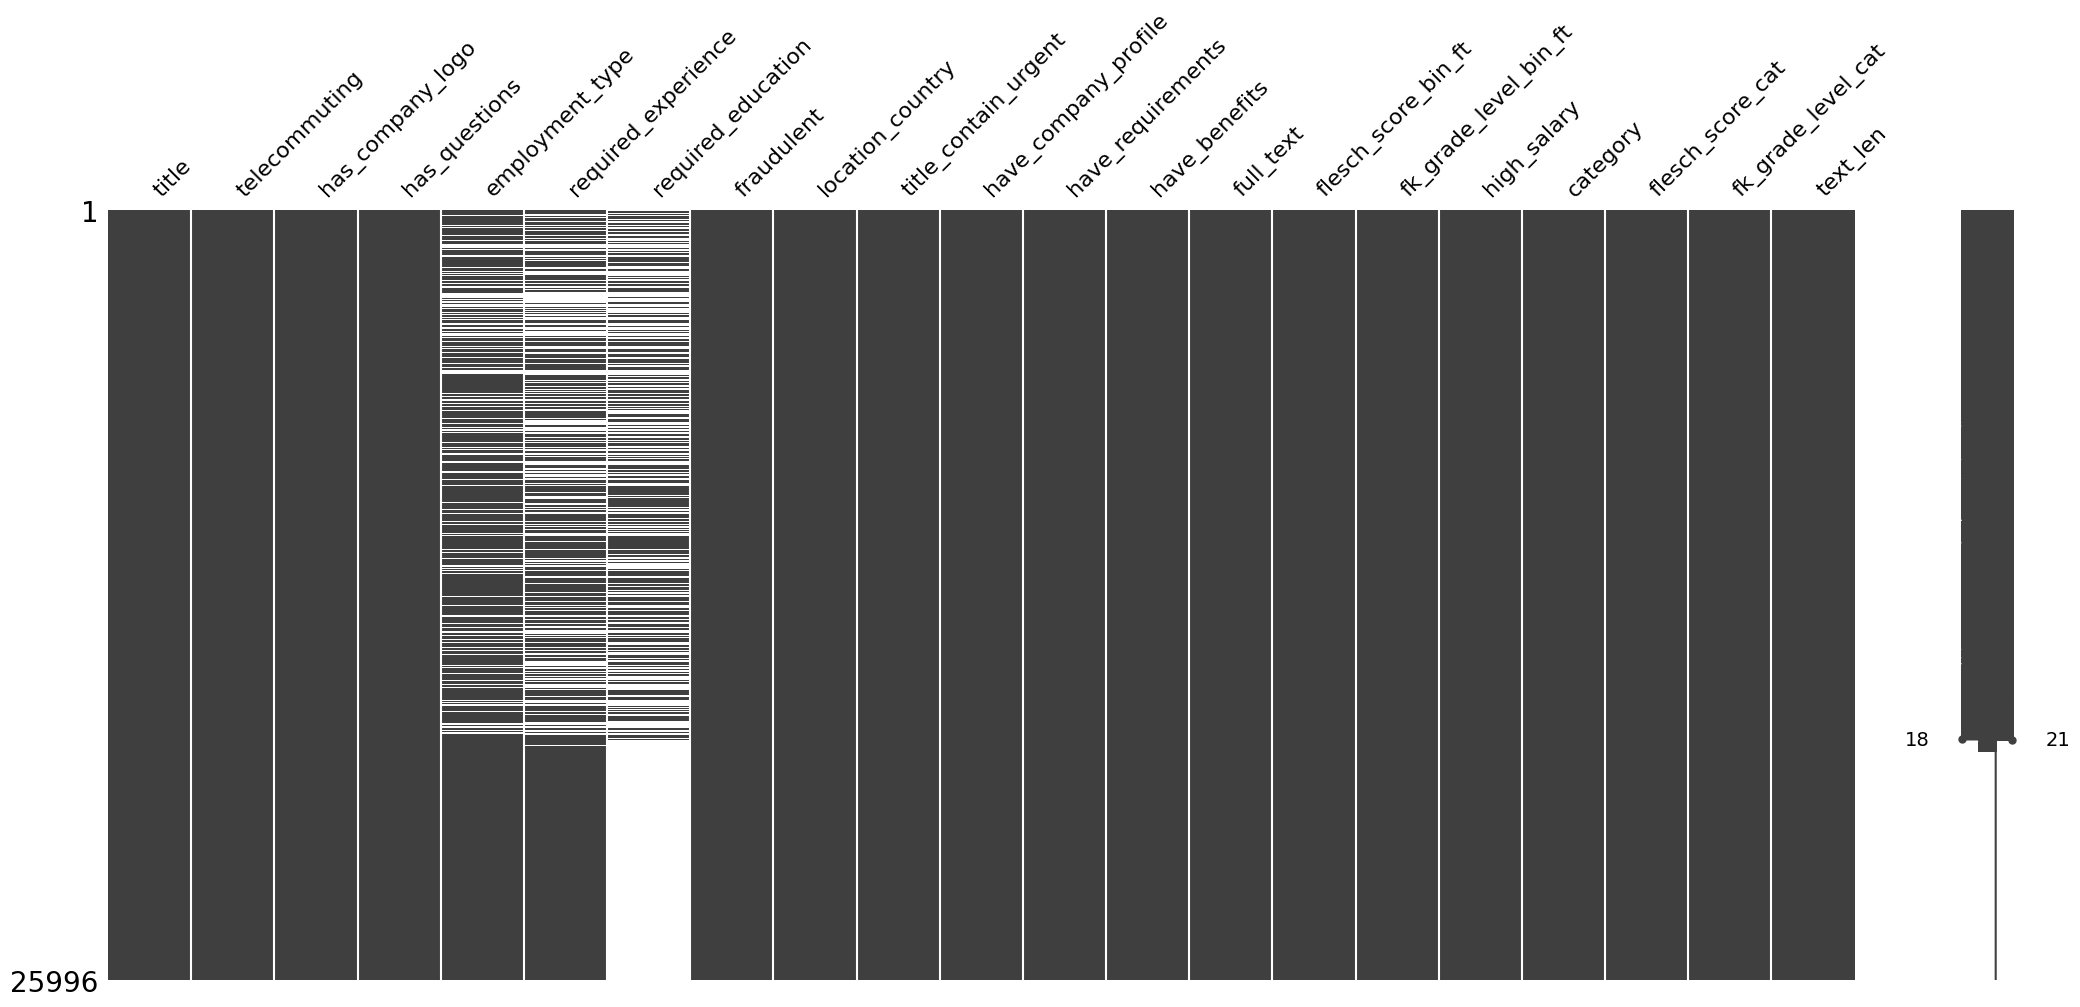

In [6]:
# Alternative way to have a quick glance to check missing values
missingno.matrix(dataset)

In [7]:
dataset.duplicated().sum()

1992

From the data, we understand that there are 0 duplicated rows and there are a lot of data columns that has a lot of NA values especially department and salary range. This is followed by required_education, benefits and required_experience. We will dive deep to understand each data columns better to make a decision if we want to drop the column or not.

In [8]:
dataset.isna().sum()

title                        0
telecommuting                0
has_company_logo             0
has_questions                0
employment_type           3471
required_experience       7084
required_education       16221
fraudulent                   0
location_country             0
title_contain_urgent         0
have_company_profile         0
have_requirements            0
have_benefits                0
full_text                    0
flesch_score_bin_ft          0
fk_grade_level_bin_ft        0
high_salary                  0
category                     0
flesch_score_cat             0
fk_grade_level_cat           0
text_len                     0
dtype: int64

In [9]:
dataset.fraudulent.value_counts()

fraudulent
0    24464
1     1532
Name: count, dtype: int64

In [10]:
dataset.has_company_logo.value_counts()

has_company_logo
1    22152
0     3844
Name: count, dtype: int64

In [11]:
dataset.has_questions.value_counts()

has_questions
0    16474
1     9522
Name: count, dtype: int64

In [12]:
dataset.employment_type.value_counts(dropna=False)

employment_type
Full-time                                                 11651
NaN                                                        3471
Full Time                                                  2957
Contract                                                   2186
Permanent, Full Time                                       2170
                                                          ...  
Temporary, Contract, Flexi-work                               1
Temporary, Contract, Part Time, Freelance, Full Time          1
Contract, Freelance, Flexi-work, Internship/Attachment        1
Temporary, Internship/Attachment                              1
Contract, Part Time, Flexi-work, Internship/Attachment        1
Name: count, Length: 104, dtype: int64

In [13]:
dataset.required_experience.value_counts(dropna=False)

required_experience
NaN                                        7084
Mid-Senior level                           3832
Entry level                                2701
Associate                                  2297
Executive                                  1867
                                           ... 
Fashion styling certification preferred       1
10+ years operations management exp           1
Ph.D. in Biomedical Sciences                  1
5+ years UX research leadership               1
Manager, Executive                            1
Name: count, Length: 92, dtype: int64

In [14]:
dataset.required_education.value_counts(dropna=False)

required_education
NaN                                  16221
Bachelor's Degree                     5145
High School or equivalent             2080
Unspecified                           1397
Master's Degree                        416
Associate Degree                       274
Certification                          170
Some College Coursework Completed      102
Professional                            74
Vocational                              49
Some High School Coursework             27
Doctorate                               26
Vocational - HS Diploma                  9
Vocational - Degree                      6
Name: count, dtype: int64

In [15]:
dataset.describe()

telecommuting  has_company_logo  has_questions    fraudulent  \
count   25996.000000      25996.000000   25996.000000  25996.000000   
mean        0.053854          0.852131       0.366287      0.058932   
std         0.225735          0.354977       0.481799      0.235502   
min         0.000000          0.000000       0.000000      0.000000   
25%         0.000000          1.000000       0.000000      0.000000   
50%         0.000000          1.000000       0.000000      0.000000   
75%         0.000000          1.000000       1.000000      0.000000   
max         1.000000          1.000000       1.000000      1.000000   

       title_contain_urgent  have_company_profile  have_requirements  \
count          25996.000000           25996.00000       25996.000000   
mean               0.002962               0.87275           0.656486   
std                0.054345               0.33326           0.474890   
min                0.000000               0.00000           0.000000   
25%                0.000000               1.00000           0.000000   
50%                0.000000               1.00000           1.000000   
75%                0.000000               1.00000           1.000000   
max                1.000000               1.00000           1.000000   

       have_benefits  flesch_score_bin_ft  fk_grade_level_bin_ft  \
count   25996.000000         25996.000000           25996.000000   
mean        0.436952             6.422988               2.282582   
std         0.496019             0.757417               1.193625   
min         0.000000             1.000000               1.000000   
25%         0.000000             6.000000               2.000000   
50%         0.000000             7.000000               2.000000   
75%         1.000000             7.000000               3.000000   
max         1.000000             7.000000               5.000000   

        high_salary  flesch_score_cat  fk_grade_level_cat      text_len  
count  25996.000000      25996.000000        25996.000000  25996.000000  
mean       0.000462          6.874519            1.736998    233.405024  
std        0.021481          0.517539            1.158905    137.704709  
min        0.000000          1.000000            1.000000      2.000000  
25%        0.000000          7.000000            1.000000    131.000000  
50%        0.000000          7.000000            1.000000    216.000000  
75%        0.000000          7.000000            2.000000    310.000000  
max        1.000000          7.000000            5.000000   1516.000000

## 4. Univariate Analysis 

Analyze individual features (columns) in isolation.

Numerical features:
    Create histograms, box plots, and density plots.
    Calculate summary statistics and more
    
Categorical features:
    Generate bar plots (count plots) to visualize category distribution.
    Display the number of unique categories and more

Identify outliers and anomalies.

In [16]:
# Filter numeric columns only
numeric_columns = dataset.select_dtypes(include="number")

# Calculate the variance for numeric columns
variance_info = numeric_columns.var()

# Display the variance for each numeric column
print(variance_info)

telecommuting                0.050956
has_company_logo             0.126009
has_questions                0.232130
fraudulent                   0.055461
title_contain_urgent         0.002953
have_company_profile         0.111062
have_requirements            0.225521
have_benefits                0.246034
flesch_score_bin_ft          0.573680
fk_grade_level_bin_ft        1.424741
high_salary                  0.000461
flesch_score_cat             0.267847
fk_grade_level_cat           1.343060
text_len                 18962.586748
dtype: float64


## Numerical Features

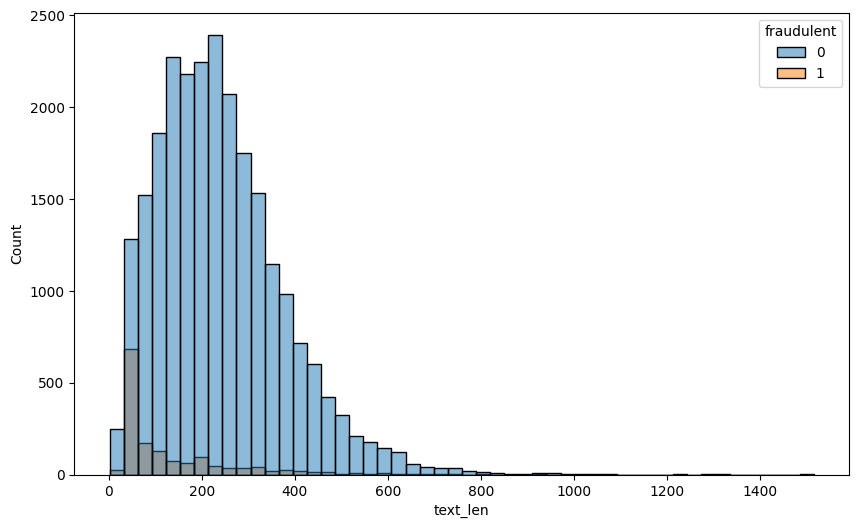

In [17]:
# text_len
plt.figure(figsize=(10,6))
sns.histplot(data=dataset, x="text_len", hue="fraudulent", kde=False, bins=50)
plt.show()

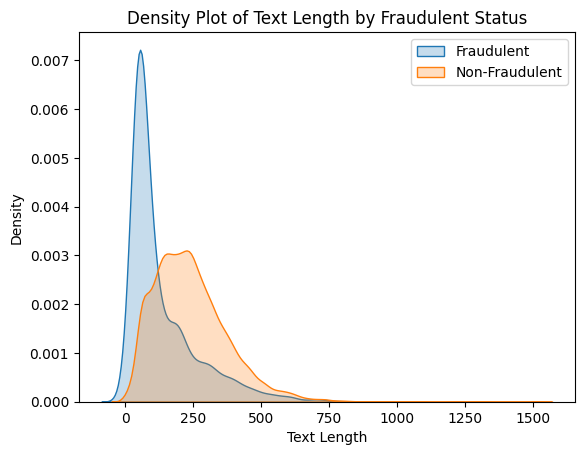

In [18]:
sns.kdeplot(dataset[dataset['fraudulent'] == 1]['text_len'], label='Fraudulent', shade=True)
sns.kdeplot(dataset[dataset['fraudulent'] == 0]['text_len'], label='Non-Fraudulent', shade=True)
plt.title('Density Plot of Text Length by Fraudulent Status')
plt.xlabel('Text Length')
plt.ylabel('Density')
plt.legend()
plt.show()

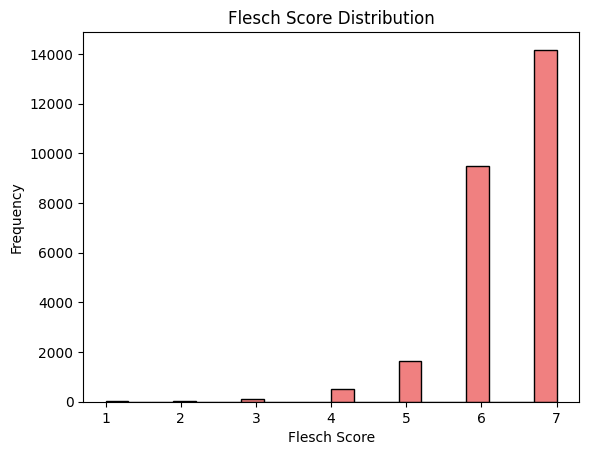

In [19]:
plt.hist(dataset['flesch_score_bin_ft'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Flesch Score Distribution')
plt.xlabel('Flesch Score')
plt.ylabel('Frequency')
plt.show()

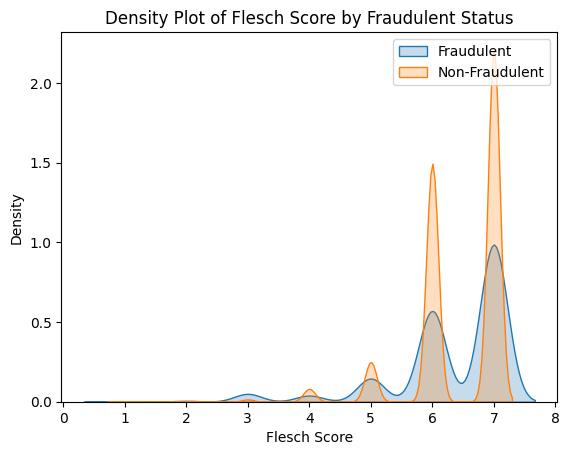

In [20]:
sns.kdeplot(dataset[dataset['fraudulent'] == 1]['flesch_score_bin_ft'], label='Fraudulent', shade=True)
sns.kdeplot(dataset[dataset['fraudulent'] == 0]['flesch_score_bin_ft'], label='Non-Fraudulent', shade=True)
plt.title('Density Plot of Flesch Score by Fraudulent Status')
plt.xlabel('Flesch Score')
plt.ylabel('Density')
plt.legend()
plt.show()

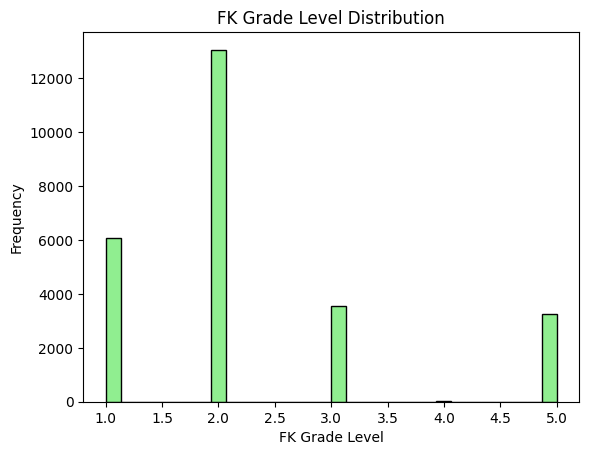

In [21]:
plt.hist(dataset['fk_grade_level_bin_ft'], bins=30, color='lightgreen', edgecolor='black')
plt.title('FK Grade Level Distribution')
plt.xlabel('FK Grade Level')
plt.ylabel('Frequency')
plt.show()

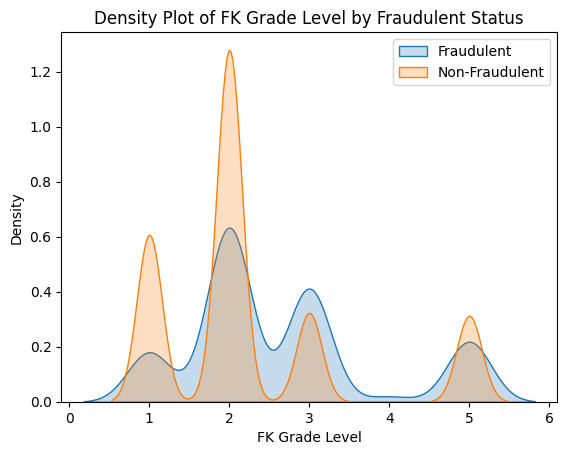

In [22]:
sns.kdeplot(dataset[dataset['fraudulent'] == 1]['fk_grade_level_bin_ft'], label='Fraudulent', shade=True)
sns.kdeplot(dataset[dataset['fraudulent'] == 0]['fk_grade_level_bin_ft'], label='Non-Fraudulent', shade=True)
plt.title('Density Plot of FK Grade Level by Fraudulent Status')
plt.xlabel('FK Grade Level')
plt.ylabel('Density')
plt.legend()
plt.show()

## Categorical Features

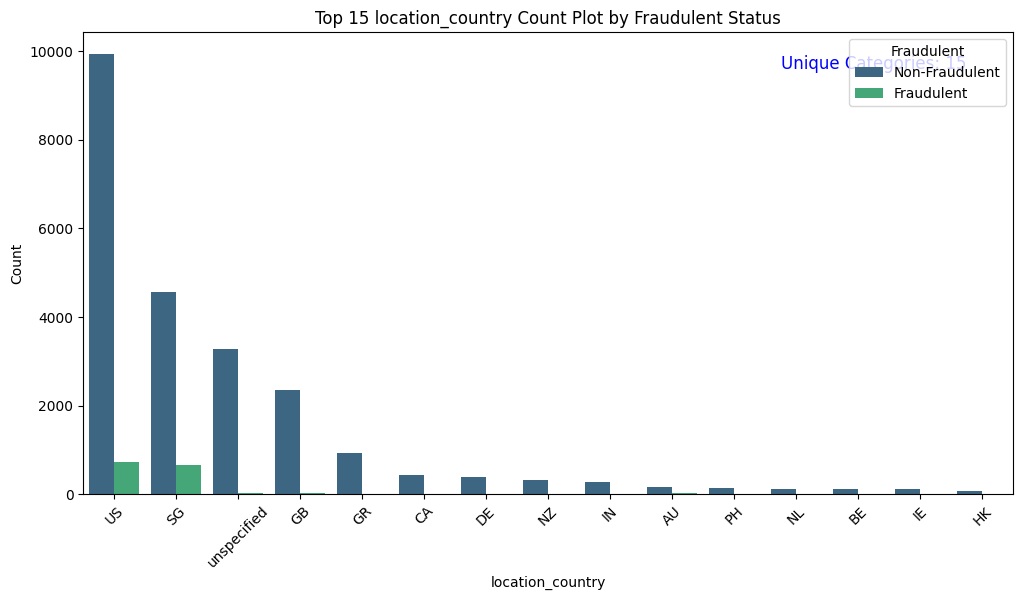

In [23]:
categorical_feature = 'location_country'

top_countries = dataset[categorical_feature].value_counts().head(15).index

filtered_dataset = dataset[dataset[categorical_feature].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_dataset, x=categorical_feature, hue='fraudulent', palette='viridis', order=top_countries)
plt.title(f'Top 15 {categorical_feature} Count Plot by Fraudulent Status')
plt.xlabel(categorical_feature)
plt.ylabel('Count')

num_unique_categories = filtered_dataset[categorical_feature].nunique()
plt.text(0.95, 0.95, f'Unique Categories: {num_unique_categories}', transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right', fontsize=12, color='blue')

plt.xticks(rotation=45)
plt.legend(title='Fraudulent', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()


### Relationship between Features and Classification Target

In [24]:
# title
dataset[dataset['fraudulent']==1]['title'].value_counts().head(10)

title
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Executive Chef                                                          10
Name: count, dtype: int64

In [25]:
dataset[dataset['fraudulent']==0]['title'].value_counts().head(5)

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
Administrative Assistant                              134
Software Engineer                                     122
Name: count, dtype: int64

In [26]:
dataset['text_len'].describe()

count    25996.000000
mean       233.405024
std        137.704709
min          2.000000
25%        131.000000
50%        216.000000
75%        310.000000
max       1516.000000
Name: text_len, dtype: float64

In [27]:
dataset[dataset['fraudulent']==0]['text_len'].describe()

count    24464.000000
mean       239.642986
std        135.804812
min          3.000000
25%        140.000000
50%        222.000000
75%        315.000000
max       1516.000000
Name: text_len, dtype: float64

In [28]:
dataset[dataset['fraudulent']==1]['text_len'].describe()

count    1532.000000
mean      133.793081
std       129.333703
min         2.000000
25%        49.000000
50%        72.000000
75%       184.000000
max       915.000000
Name: text_len, dtype: float64

In [29]:
# full_text
fraud_text = dataset[dataset.fraudulent == 1].full_text
nonfraud_text = dataset[dataset.fraudulent == 0].full_text

In [30]:
# full_text
fraud_cat = dataset[dataset.fraudulent == 1].category
nonfraud_cat = dataset[dataset.fraudulent == 0].category

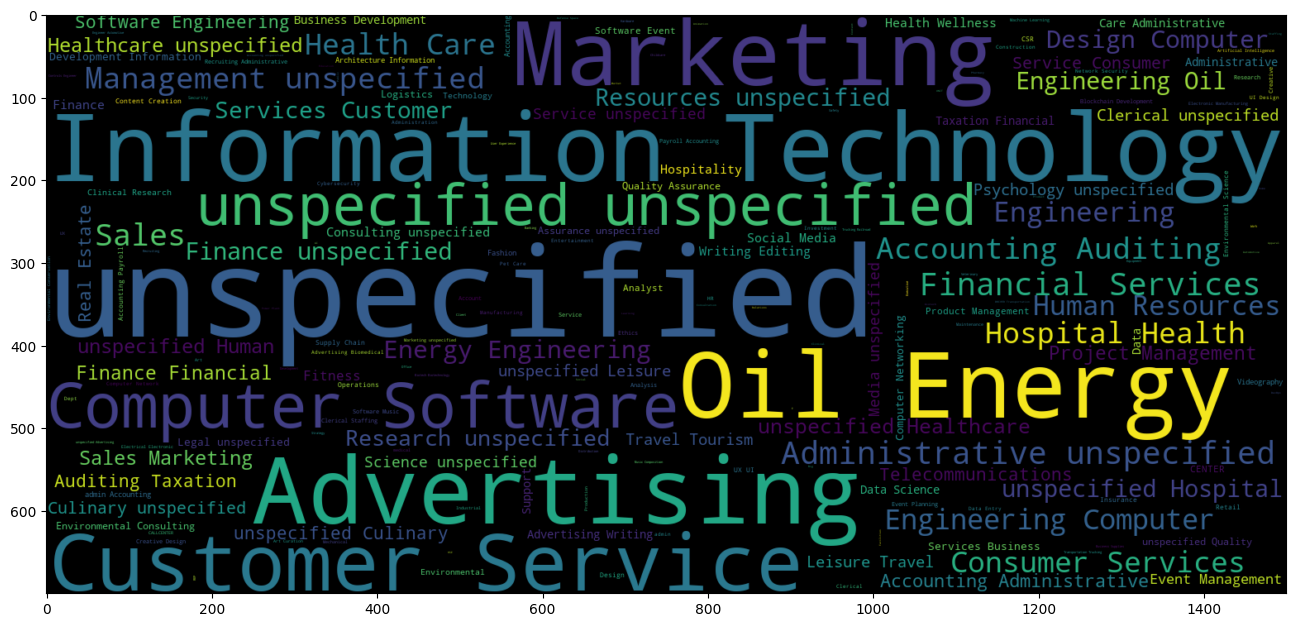

In [31]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,8))
wc = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1500 , height = 700 , stopwords = STOPWORDS).generate(str(" ".join(fraud_cat)))
plt.imshow(wc,interpolation = 'bilinear')

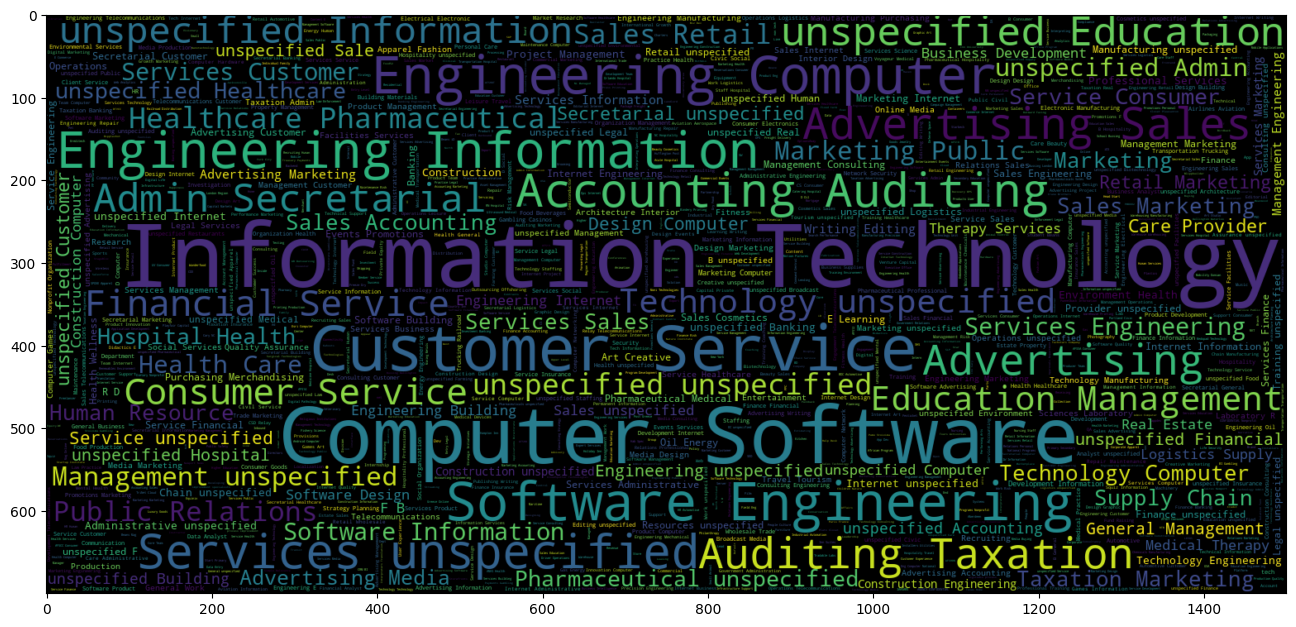

In [32]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,8))
wc = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1500 , height = 700 , stopwords = STOPWORDS).generate(str(" ".join(nonfraud_cat)))
plt.imshow(wc,interpolation = 'bilinear')

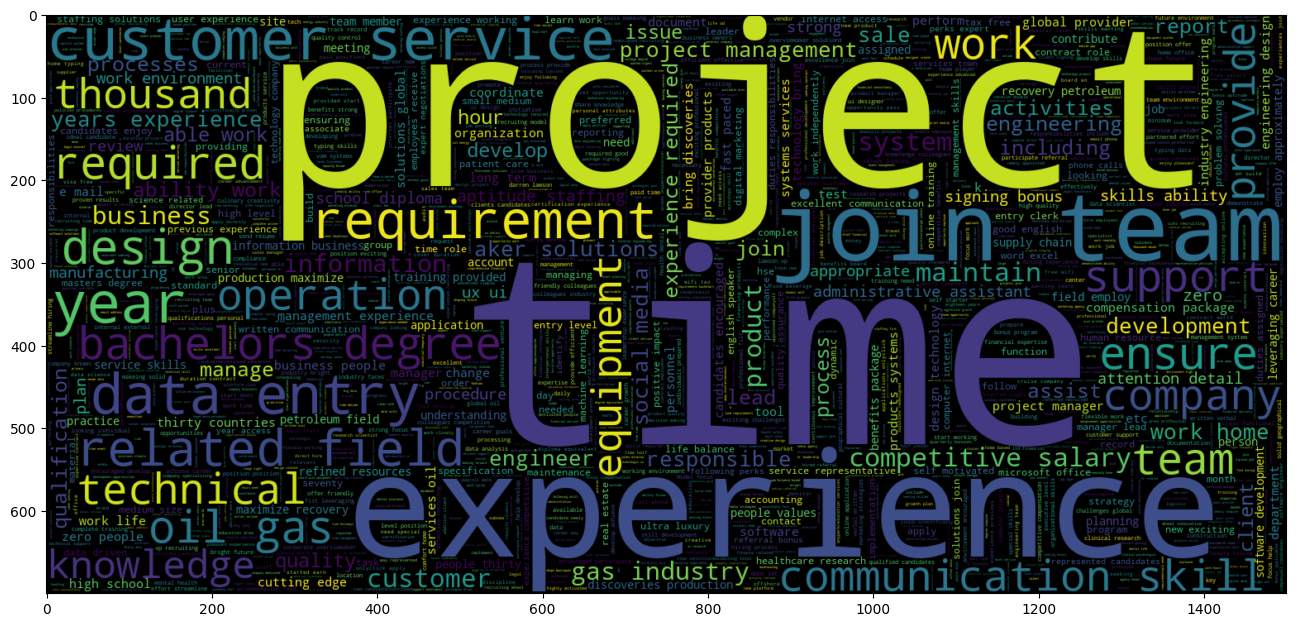

In [33]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,8))
wc = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1500 , height = 700 , stopwords = STOPWORDS).generate(str(" ".join(fraud_text)))
plt.imshow(wc,interpolation = 'bilinear')

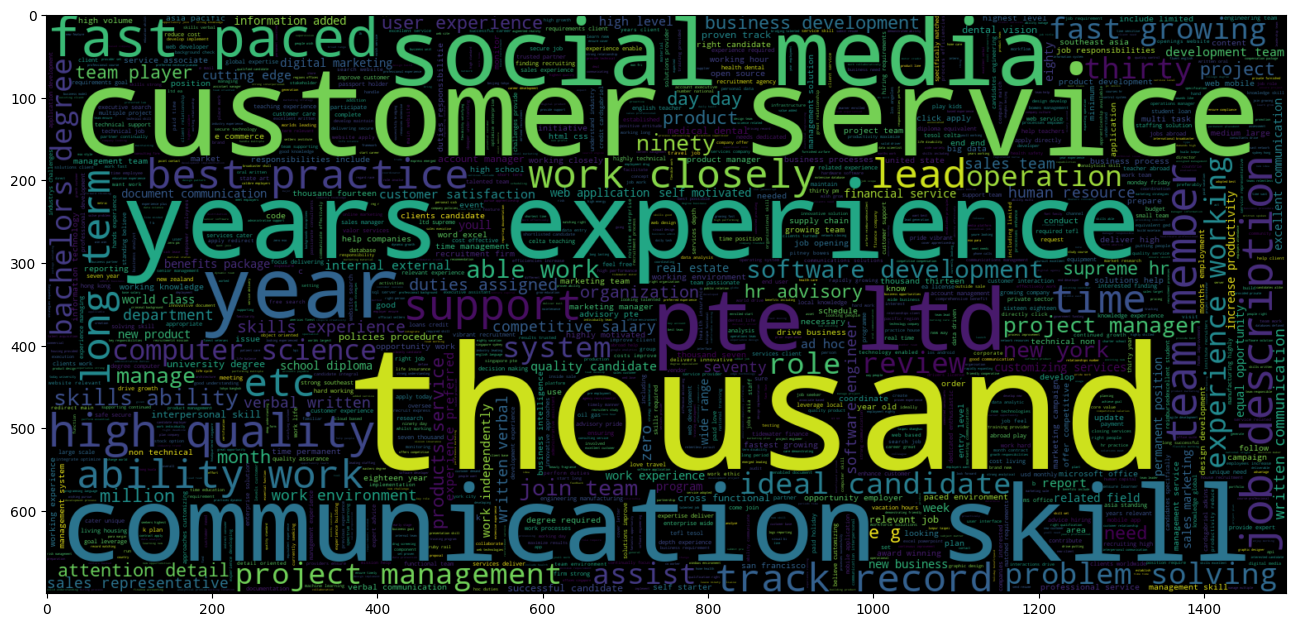

In [34]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,8))
wc = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1500 , height = 700 , stopwords = STOPWORDS).generate(str(" ".join(nonfraud_text)))
plt.imshow(wc,interpolation = 'bilinear')

<Axes: xlabel='have_company_profile'>

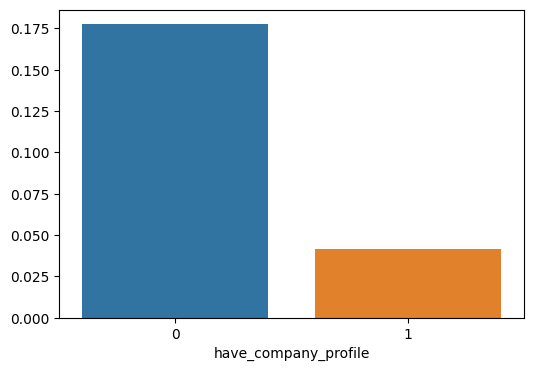

In [35]:
# have_company_profile
data = dataset.groupby('have_company_profile')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=data.index, y=data.values, ax=ax)

<Axes: xlabel='have_requirements'>

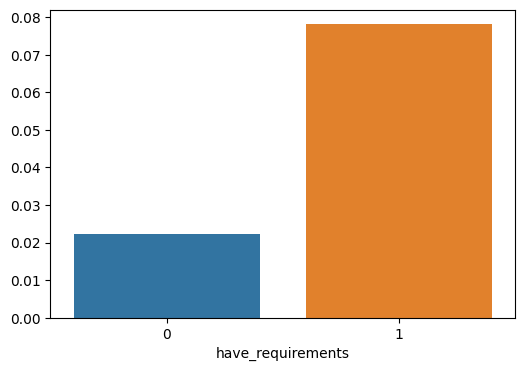

In [36]:
# have_requirements
data = dataset.groupby('have_requirements')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=data.index, y=data.values, ax=ax)

<Axes: xlabel='have_benefits'>

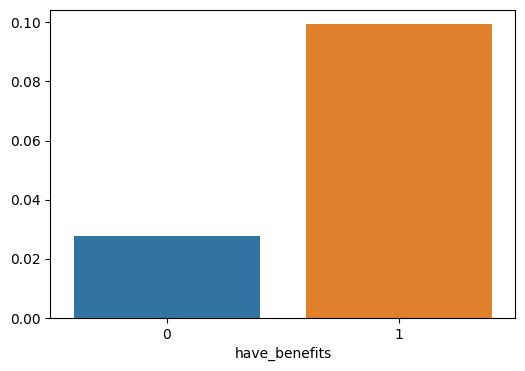

In [37]:
# have_benefits
data = dataset.groupby('have_benefits')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=data.index, y=data.values, ax=ax)

<Axes: xlabel='high_salary'>

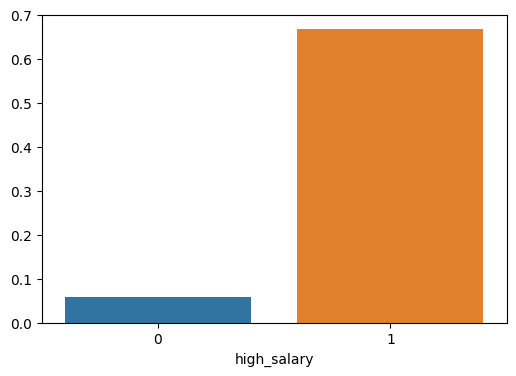

In [58]:
# have_benefits
data = dataset.groupby('high_salary')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=data.index, y=data.values, ax=ax)

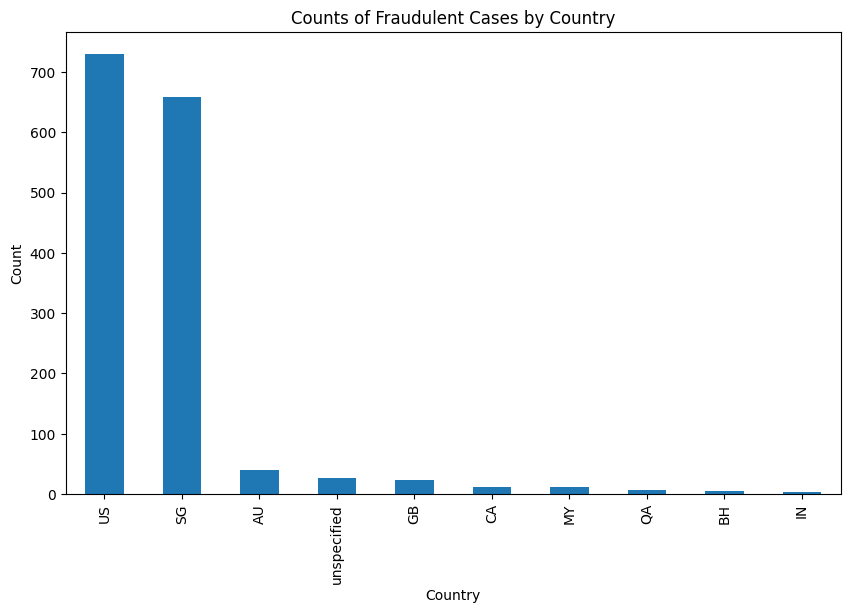

In [38]:
# location
fraudulent_ctry = dataset[dataset['fraudulent'] == 1]['location_country'].value_counts()
fraudulent_ctry_10 = fraudulent_ctry.head(10)
plt.figure(figsize=(10, 6))
fraudulent_ctry_10.plot(kind='bar')
plt.title('Counts of Fraudulent Cases by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

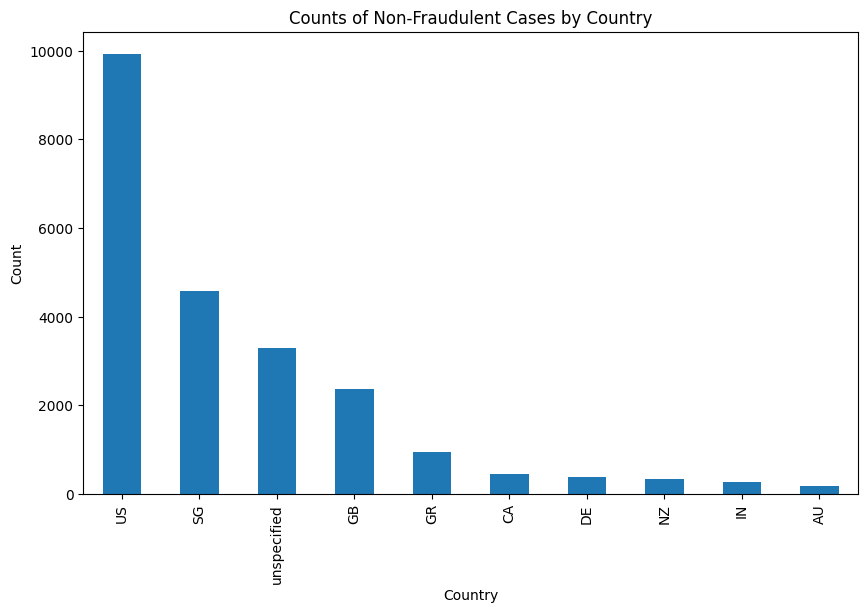

In [39]:
non_fraudulent_ctry = dataset[dataset['fraudulent'] == 0]['location_country'].value_counts()
non_fraudulent_ctry_10 = non_fraudulent_ctry.head(10)
plt.figure(figsize=(10, 6))
non_fraudulent_ctry_10.plot(kind='bar')
plt.title('Counts of Non-Fraudulent Cases by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='telecommuting'>

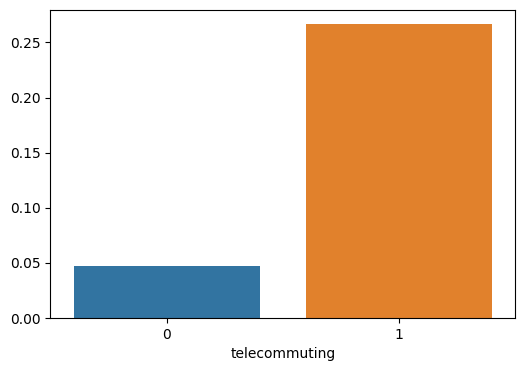

In [40]:
# telecommuting
telecommuting_fraud = dataset.groupby('telecommuting')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=telecommuting_fraud.index, y=telecommuting_fraud.values, ax=ax)

<Axes: xlabel='telecommuting', ylabel='count'>

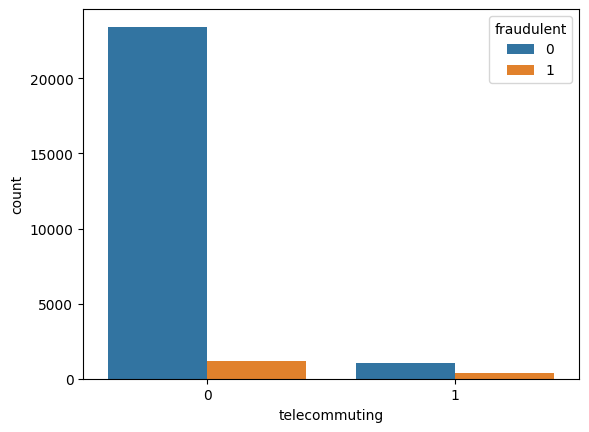

In [41]:
sns.countplot(x='telecommuting',data=dataset,hue='fraudulent')

<Axes: xlabel='has_company_logo'>

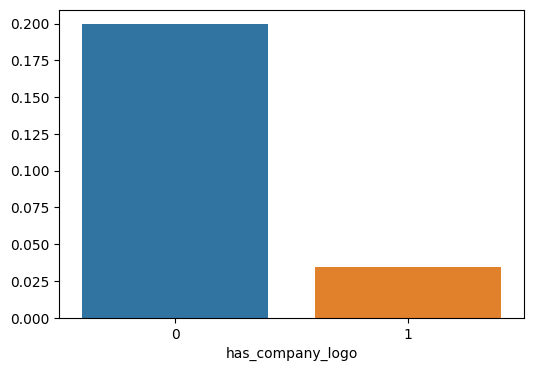

In [42]:
# has_company_logo
has_company_logo_fraud = dataset.groupby('has_company_logo')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=has_company_logo_fraud.index, y=has_company_logo_fraud.values, ax=ax)

<Axes: xlabel='has_company_logo', ylabel='count'>

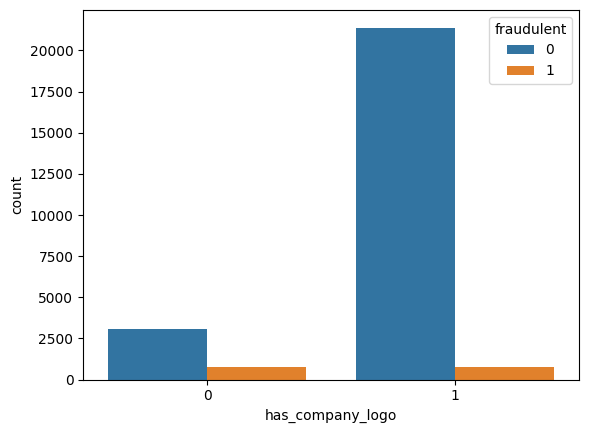

In [43]:
sns.countplot(x='has_company_logo',data=dataset,hue='fraudulent')

<Axes: xlabel='has_questions'>

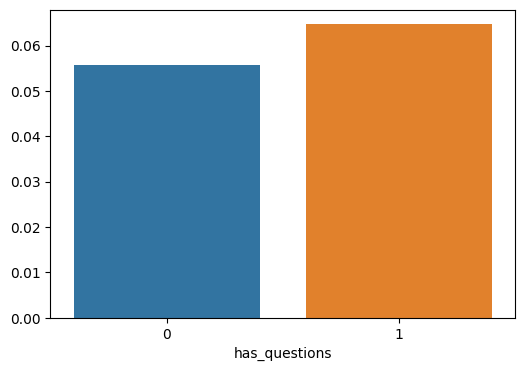

In [44]:
# has_questions
has_questions_fraud = dataset.groupby('has_questions')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(6,4))
sns.barplot(x=has_questions_fraud.index, y=has_questions_fraud.values, ax=ax)

<Axes: xlabel='has_questions', ylabel='count'>

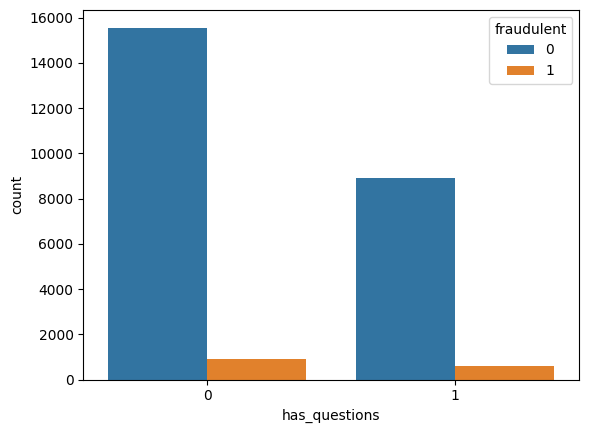

In [45]:
sns.countplot(x='has_questions',data=dataset,hue='fraudulent')

<Axes: xlabel='employment_type'>

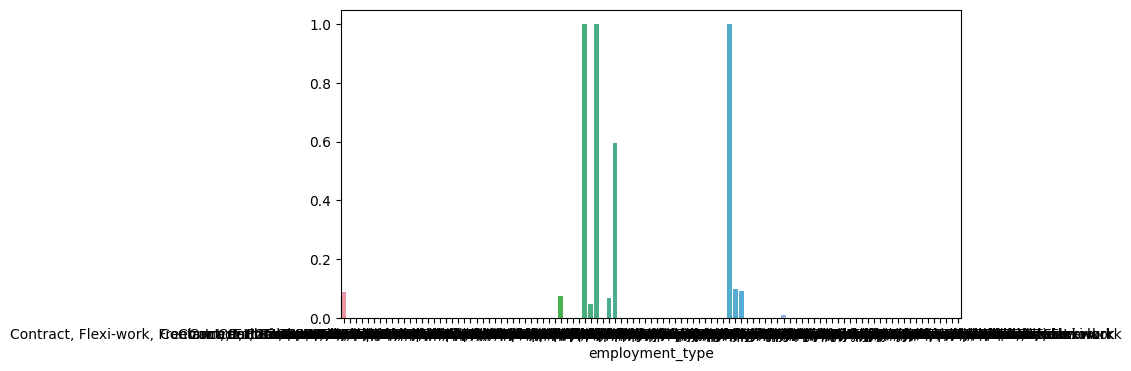

In [46]:
# employment_type
employment_type_fraud = dataset.groupby('employment_type')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.barplot(x=employment_type_fraud.index, y=employment_type_fraud.values, ax=ax)

<Axes: xlabel='employment_type', ylabel='count'>

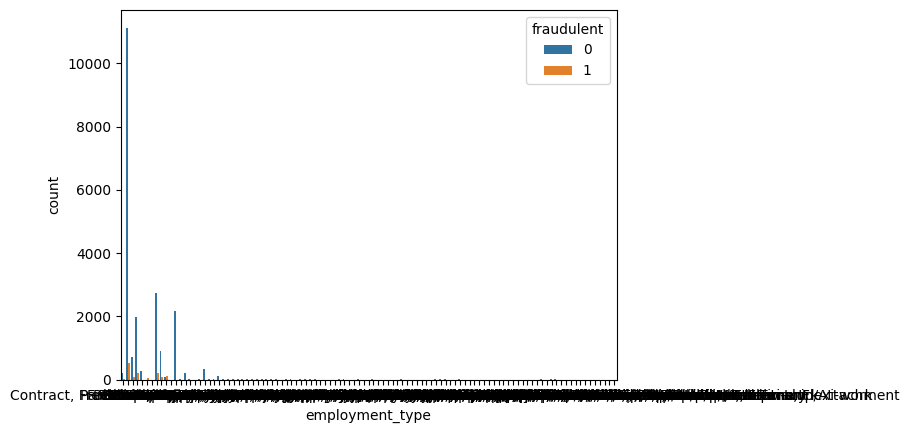

In [47]:
sns.countplot(x='employment_type',data=dataset,hue='fraudulent')

<Axes: xlabel='required_experience'>

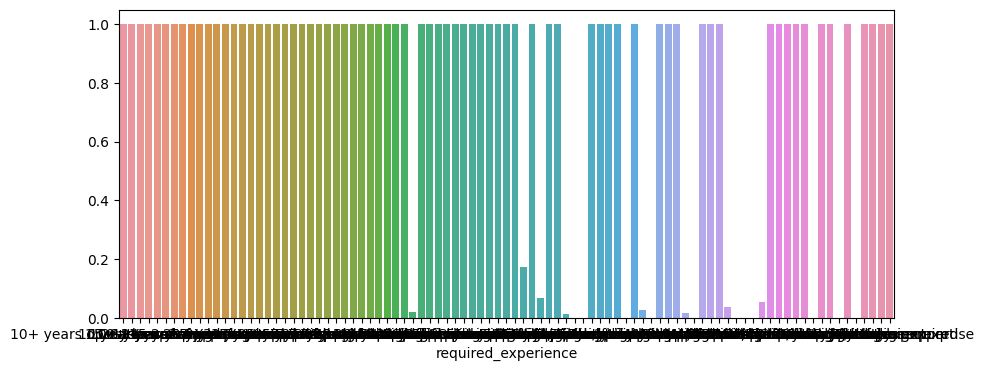

In [48]:
# required_experience
required_experience_fraud = dataset.groupby('required_experience')['fraudulent'].mean()
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.barplot(x=required_experience_fraud.index, y=required_experience_fraud.values, ax=ax)

<Axes: xlabel='required_experience', ylabel='count'>

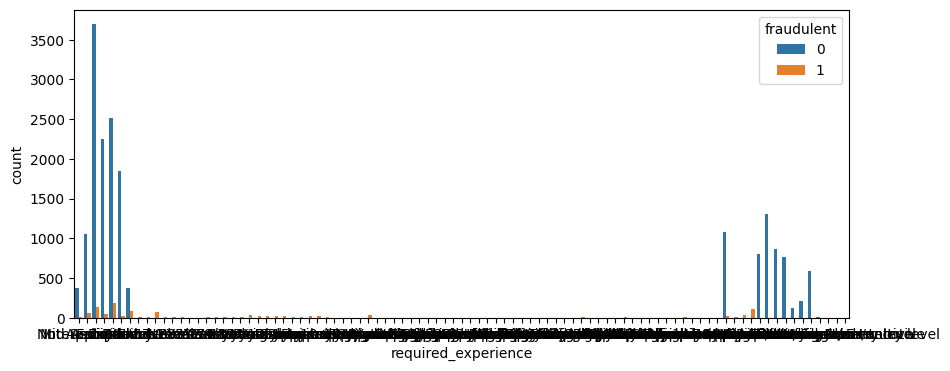

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(10,4))
sns.countplot(x='required_experience',data=dataset,hue='fraudulent',ax=ax)

In [50]:
# required_education
dataset[dataset['fraudulent']==1]['required_education'].value_counts()

required_education
High School or equivalent            170
Bachelor's Degree                    100
Unspecified                           61
Master's Degree                       31
Some High School Coursework           20
Certification                         19
Associate Degree                       6
Professional                           4
Some College Coursework Completed      3
Doctorate                              1
Name: count, dtype: int64

In [51]:
dataset[dataset['fraudulent']==0]['required_education'].value_counts()

required_education
Bachelor's Degree                    5045
High School or equivalent            1910
Unspecified                          1336
Master's Degree                       385
Associate Degree                      268
Certification                         151
Some College Coursework Completed      99
Professional                           70
Vocational                             49
Doctorate                              25
Vocational - HS Diploma                 9
Some High School Coursework             7
Vocational - Degree                     6
Name: count, dtype: int64

## 5. Bivariate Analysis

Analyze relationships between pairs of variables.

Numerical features:
    Create scatter plots or pair plots to visualize correlations.
    Compute correlation coefficients (e.g., Pearson, Spearman).

Categorical features:
    Create cross-tabulations or stacked bar plots.

Investigate relationships between numerical and categorical variables. 

Correlation Analysis

### Correlation Analysis

In [52]:
from scipy import stats

numerical_features = dataset[['telecommuting', 'has_company_logo', 'has_questions',
                             'title_contain_urgent', 'have_company_profile', 'have_requirements',
                             'have_benefits', 'flesch_score_bin_ft', 'fk_grade_level_bin_ft', 'high_salary', 'text_len']]

correlation_with_fraudulent = []
for column in numerical_features.columns:
    point_biserial = stats.pointbiserialr(dataset['fraudulent'], numerical_features[column])
    correlation_with_fraudulent.append((column, point_biserial.correlation, point_biserial.pvalue))

correlation_df = pd.DataFrame(correlation_with_fraudulent, columns=['Feature', 'Point-Biserial Correlation', 'p-value'])

print(correlation_df)

                  Feature  Point-Biserial Correlation        p-value
0           telecommuting                    0.210211  1.854448e-257
1        has_company_logo                   -0.248704   0.000000e+00
2           has_questions                    0.018596   2.714505e-03
3    title_contain_urgent                    0.097575   5.075282e-56
4    have_company_profile                   -0.192166  1.057762e-214
5       have_requirements                    0.112913   1.634507e-74
6           have_benefits                    0.151352  5.111357e-133
7     flesch_score_bin_ft                   -0.031922   2.632977e-07
8   fk_grade_level_bin_ft                    0.073500   1.774339e-32
9             high_salary                    0.055458   3.615960e-19
10               text_len                   -0.181024  2.333175e-190


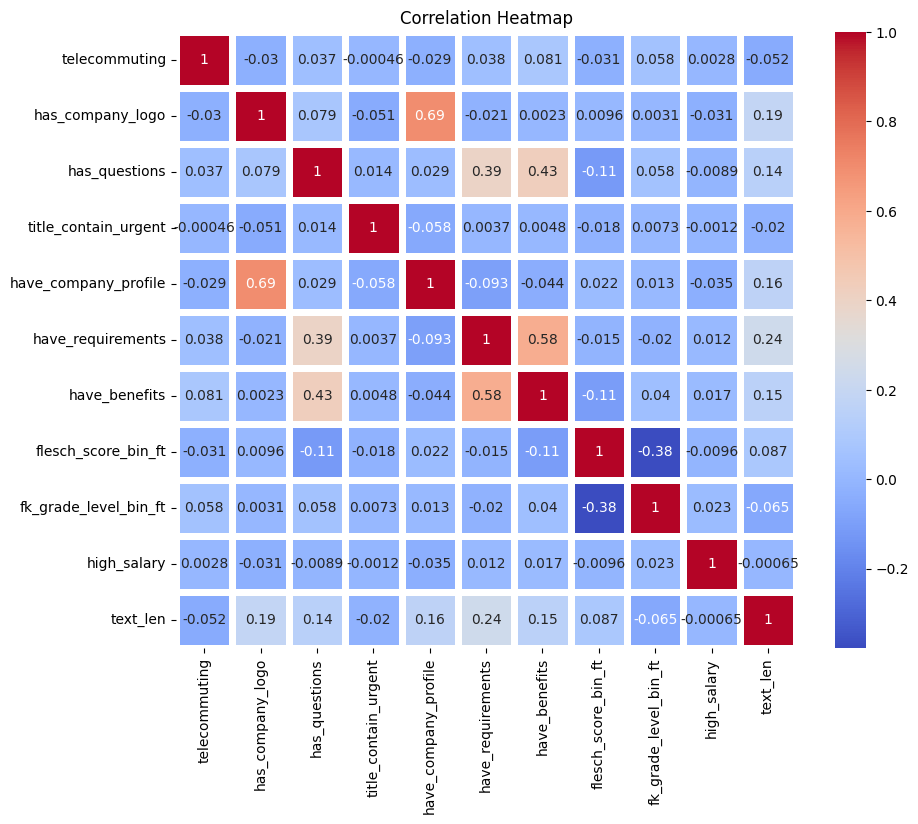

In [53]:
matrix = numerical_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=5, annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()


In [54]:
# Categorical Feature Distribution
fraudulent_distribution = dataset['fraudulent'].value_counts()

# Categorical Features vs. Fraudulent
cat_features = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']
for feature in cat_features:
    cross_tab = pd.crosstab(dataset[feature], dataset['fraudulent'])
    chi2, p, _, _ = stats.chi2_contingency(cross_tab)
    print(f'Chi-Square Test for {feature} vs. Fraudulent Status - p-value: {p}')

Chi-Square Test for telecommuting vs. Fraudulent Status - p-value: 6.116282957525283e-251
Chi-Square Test for has_company_logo vs. Fraudulent Status - p-value: 0.0
Chi-Square Test for has_questions vs. Fraudulent Status - p-value: 0.0029693088209830727
Chi-Square Test for employment_type vs. Fraudulent Status - p-value: 0.0
Chi-Square Test for required_experience vs. Fraudulent Status - p-value: 0.0
Chi-Square Test for required_education vs. Fraudulent Status - p-value: 7.684947749658579e-101


Text(0, 0.5, 'Count')

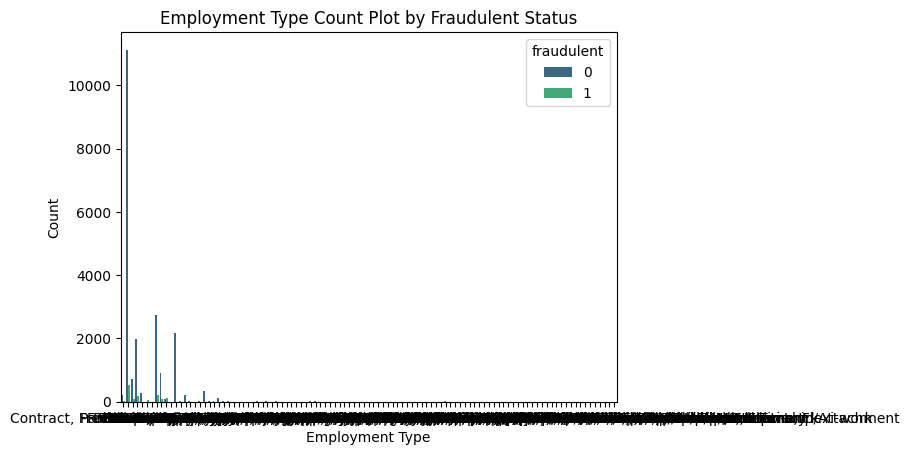

In [55]:
sns.countplot(data=dataset, x='employment_type', hue='fraudulent', palette='viridis')
plt.title('Employment Type Count Plot by Fraudulent Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')

## 6. Multivariate Analysis

Explore relationships among more than two variables.
    
Use techniques like heatmap, 3D scatter plots, or parallel coordinates plots.
    
Identify patterns or clusters in the data.

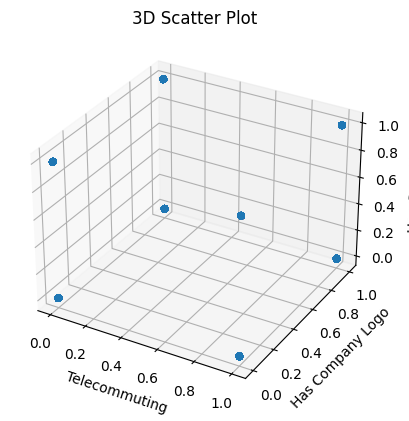

In [56]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = dataset['telecommuting']
y = dataset['has_company_logo']
z = dataset['has_questions']

ax.scatter(x, y, z)
ax.set_xlabel('Telecommuting')
ax.set_ylabel('Has Company Logo')
ax.set_zlabel('Has Questions')

plt.title('3D Scatter Plot')
plt.show()


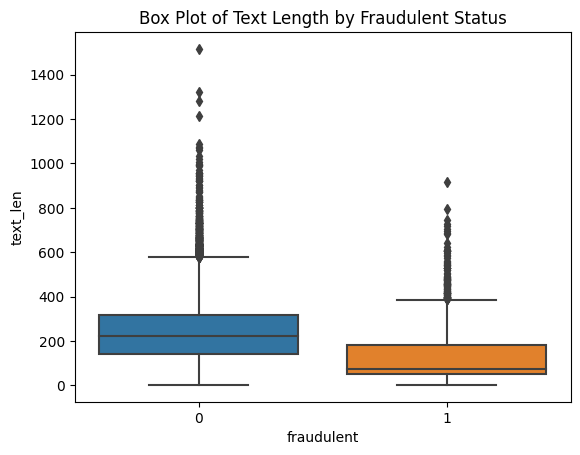

In [57]:
import seaborn as sns

sns.boxplot(x='fraudulent', y='text_len', data=dataset)
plt.title('Box Plot of Text Length by Fraudulent Status')
plt.show()

## 7. Text Analysis (?)